In [1]:
# importando os pacotes

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Diretórios 

cwd = os.getcwd()

print('Diretório atual: ' + cwd)

dataPath = os.path.dirname(cwd) +'\\dados'

print('Diretório de dados:' + dataPath)

Diretório atual: C:\Users\rafael.shibayama\Documents\GitHub\ENS410064\2024\Notebooks
Diretório de dados:C:\Users\rafael.shibayama\Documents\GitHub\ENS410064\2024\dados


In [3]:
dataList = os.listdir(dataPath)

print(dataList)

dataList[0]


['AirportFl.csv']


'AirportFl.csv'

In [5]:
prefixed = [filename for filename in os.listdir(dataPath) if filename.startswith("AirportFl")]

dataList = prefixed

print(prefixed)

['AirportFl.csv']


In [6]:
path = r'C:\Users\rafael.shibayama\Documents\GitHub\ENS410064\2024\Dados\AirportFl.csv'

data = pd.read_csv(path, encoding='ISO-8859-1')

data


,Data,Hora (UTC),Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),Temp. Min. [Diaria] (h),Chuva [Diaria] (mm)
0,01/01/2023,0,25.3,82.0,1014.2,5.1,360.0,5.0,NaN,29.6,NaN,NaN
1,01/01/2023,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2023,600,24.2,92.0,1013.2,3.6,330.0,3.8,NaN,NaN,NaN,NaN
3,01/01/2023,900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2023,1200,26.5,76.0,1015.0,4.1,350.0,7.5,NaN,NaN,23.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2923,01/01/2024,900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2924,01/01/2024,1200,21.8,96.0,1016.1,2.6,260.0,10.0,NaN,NaN,20.7,2.0
2925,01/01/2024,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2926,01/01/2024,1800,25.2,75.0,1013.8,2.6,360.0,8.8,NaN,NaN,NaN,NaN


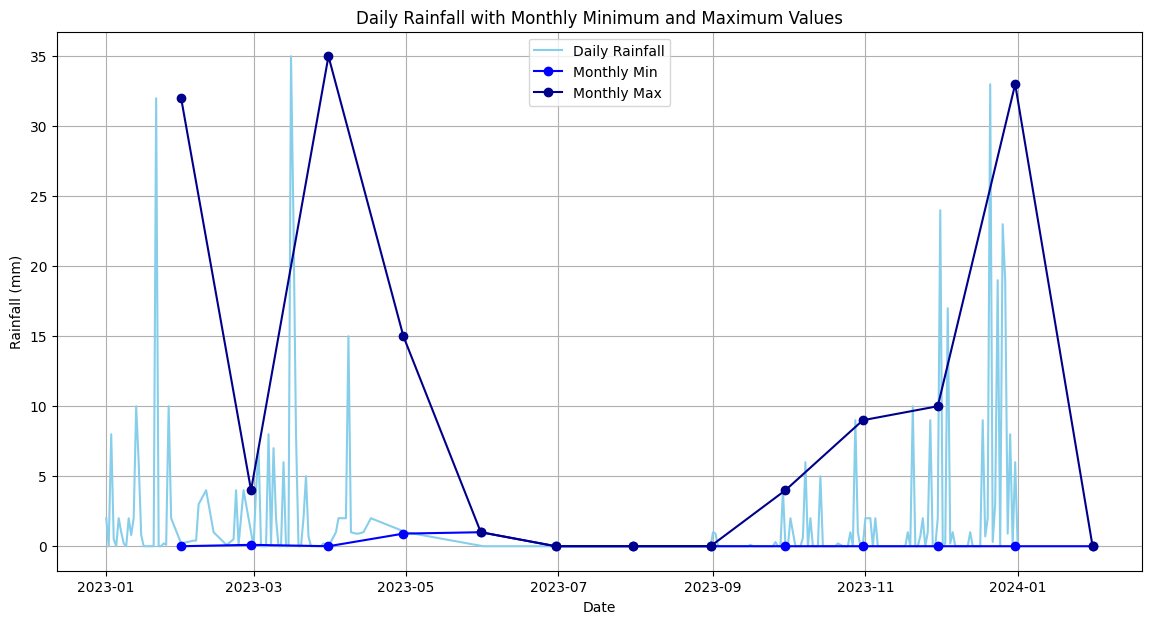

In [20]:
#  Caminho do arquivo CSV com os dados
path = r'C:\Users\rafael.shibayama\Documents\GitHub\ENS410064\2024\Dados\AirportFl.csv'

# Converter a coluna 'Data' para o formato datetime para facilitar o agrupamento mensal
data['Data'] = pd.to_datetime(data['Data'], format='%d/%m/%Y')

# Selecionar apenas as colunas necessárias e remover linhas com valores de chuva nulos
rain_data = data[['Data', 'Chuva [Diaria] (mm)']].dropna()

# Definir a data como índice para facilitar a análise e o agrupamento
rain_data.set_index('Data', inplace=True)

# Calcular o mínimo e o máximo de precipitação mensal
monthly_min = rain_data.resample('ME').min()
monthly_max = rain_data.resample('ME').max()

# Plotar a precipitação diária com mínimos e máximos mensais
plt.figure(figsize=(14, 7))
plt.plot(rain_data.index, rain_data['Chuva [Diaria] (mm)'], label='Daily Rainfall', color='skyblue')
plt.plot(monthly_min.index, monthly_min['Chuva [Diaria] (mm)'], label='Monthly Min', marker='o', color='blue')
plt.plot(monthly_max.index, monthly_max['Chuva [Diaria] (mm)'], label='Monthly Max', marker='o', color='darkblue')

# Adicionar rótulos e título
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Daily Rainfall with Monthly Minimum and Maximum Values')
plt.legend()
plt.grid(True)

# Caminho para salvar a figura
base_path = r'C:\Users\rafael.shibayama\Documents\GitHub\ENS410064\2024\figuras'
activity_folder = os.path.join(base_path, 'Atividade3')
os.makedirs(activity_folder, exist_ok=True)

# Nome do arquivo com o caminho completo
file_name = os.path.join(activity_folder, 'chuvas_AirportFl.png')

# Salvar a figura
plt.savefig(file_name, format='png', dpi=300)

# Exibir o gráfico
plt.show()

In [9]:
import pymannkendall as mk

# Caminho do arquivo
path = r'C:\Users\rafael.shibayama\Documents\GitHub\ENS410064\2024\Dados\AirportFl.csv'

# Converter a coluna 'Data' para datetime, se necessário
data['Data'] = pd.to_datetime(data['Data'], format='%d/%m/%Y')

# Selecionar a coluna de interesse, por exemplo, 'Chuva [Diaria] (mm)'
rain_data = data.set_index('Data')['Chuva [Diaria] (mm)'].dropna()

# Aplicar o teste de Mann-Kendall para avaliar a tendência
result = mk.seasonal_test(rain_data, period=12)  # Use 12 para uma série mensal; altere conforme necessário

# Exibir os resultados
print("Mann-Kendall Seasonal Test Results:")
print(f"Tendency: {result.trend}")
print(f"Slope: {result.slope}")
print(f"P-value: {result.p}")
print(f"Z-statistic: {result.z}")

Mann-Kendall Seasonal Test Results:
Tendency: no trend
Slope: 0.0
P-value: 0.09077581711579952
Z-statistic: -1.691319398208327


Slope: 0.0
Intercept: 0.0
Lower 95% CI for slope: 0.0
Upper 95% CI for slope: 0.0


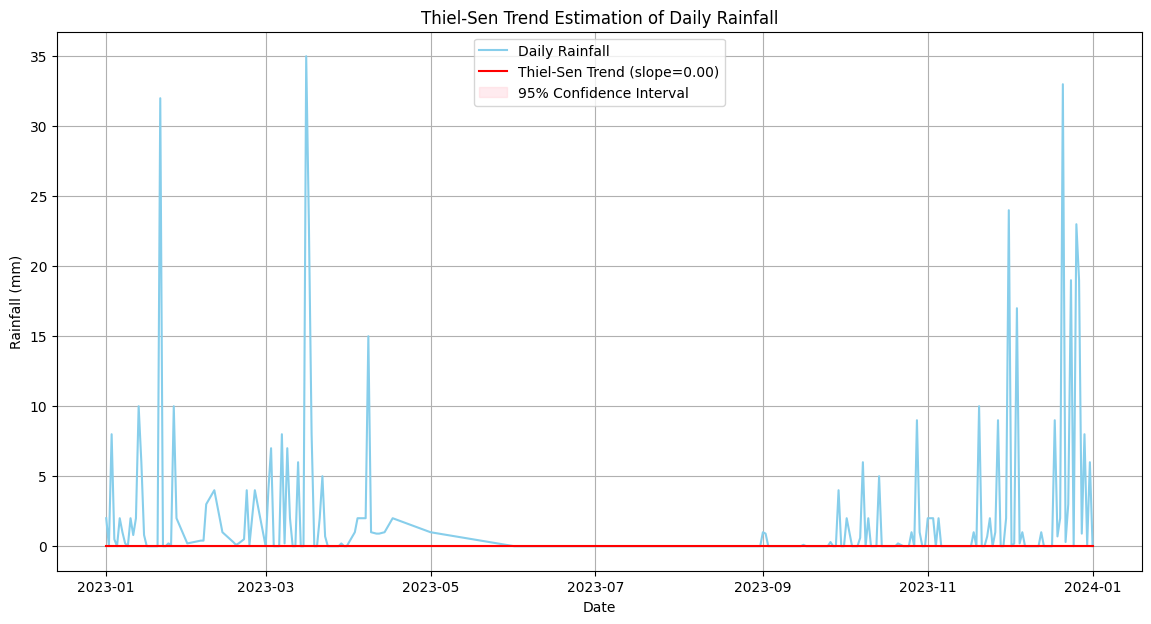

In [21]:
from scipy.stats import theilslopes

# Caminho do arquivo
path = r'C:\Users\rafael.shibayama\Documents\GitHub\ENS410064\2024\Dados\AirportFl.csv'

# Converter a coluna 'Data' para datetime, se necessário
data['Data'] = pd.to_datetime(data['Data'], format='%d/%m/%Y')

# Selecionar a coluna de interesse, por exemplo, 'Chuva [Diaria] (mm)'
rain_data = data.set_index('Data')['Chuva [Diaria] (mm)'].dropna()

# Transformar o índice de datas em valores numéricos para o modelo
# Aqui, usamos o número de dias a partir do primeiro registro
x = (rain_data.index - rain_data.index[0]).days
y = rain_data.values

# Aplicar o estimador de Thiel-Sen para calcular a tendência
slope, intercept, lower_slope, upper_slope = theilslopes(y, x, 0.95)

# Exibir os resultados
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Lower 95% CI for slope: {lower_slope}")
print(f"Upper 95% CI for slope: {upper_slope}")

# Plotar a série temporal com a linha de tendência
plt.figure(figsize=(14, 7))
plt.plot(rain_data.index, y, label='Daily Rainfall', color='skyblue')
plt.plot(rain_data.index, intercept + slope * x, 'r-', label=f'Thiel-Sen Trend (slope={slope:.2f})')
plt.fill_between(rain_data.index, intercept + lower_slope * x, intercept + upper_slope * x, color='pink', alpha=0.3, label='95% Confidence Interval')

# Adicionar rótulos e título
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Thiel-Sen Trend Estimation of Daily Rainfall')
plt.legend()
plt.grid(True)

# Caminho para salvar a figura
base_path = r'C:\Users\rafael.shibayama\Documents\GitHub\ENS410064\2024\figuras'

# Nome do arquivo com o caminho completo
file_name = os.path.join(activity_folder, 'thiel-Sen_AirportFl.png')

# Salvar a figura
plt.savefig(file_name, format='png', dpi=300)

# Exibir o gráfico
plt.show()

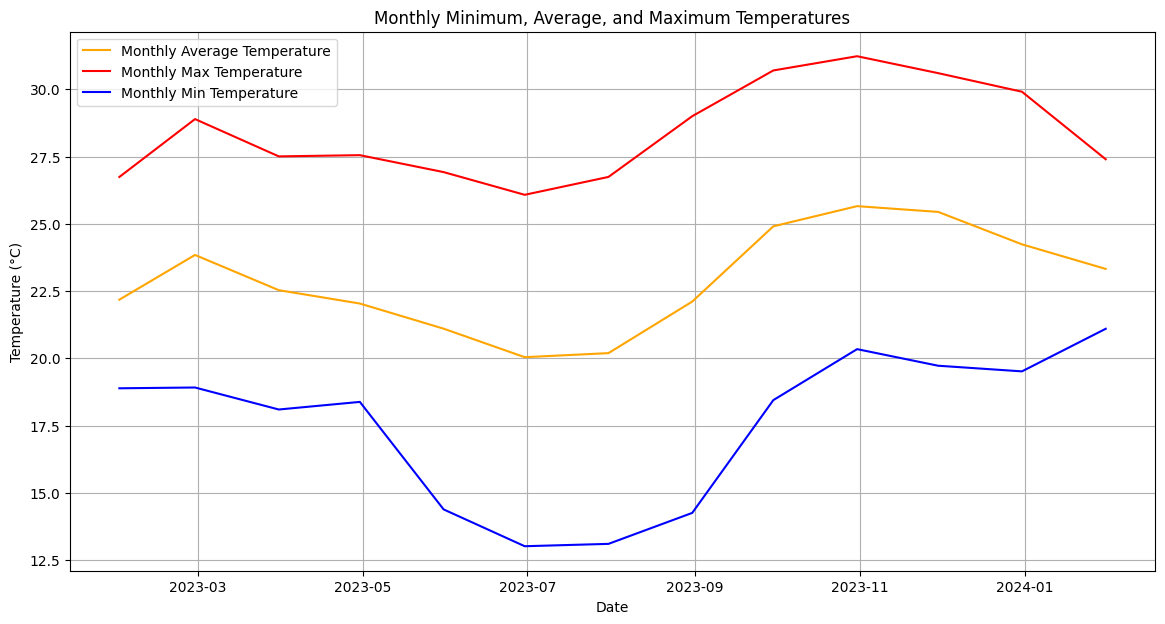

In [26]:
# Caminho do arquivo
path = r'C:\Users\rafael.shibayama\Documents\GitHub\ENS410064\2024\Dados\AirportFl.csv'

# Converter a coluna 'Data' para o formato datetime para permitir a agregação mensal
data['Data'] = pd.to_datetime(data['Data'], format='%d/%m/%Y')

# Selecionar as colunas de interesse
temperature_data = data[['Data', 'Temp. [Hora] (C)', 'Temp. Max. [Diaria] (h)', 'Temp. Min. [Diaria] (h)']].copy()
temperature_data.set_index('Data', inplace=True)

# Calcular médias mensais para as temperaturas diária média, máxima e mínima
monthly_avg_temp = temperature_data['Temp. [Hora] (C)'].resample('ME').mean()
monthly_max_temp = temperature_data['Temp. Max. [Diaria] (h)'].resample('ME').mean()
monthly_min_temp = temperature_data['Temp. Min. [Diaria] (h)'].resample('ME').mean()

# Plotar os dados
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg_temp.index, monthly_avg_temp, label='Monthly Average Temperature', color='orange')
plt.plot(monthly_max_temp.index, monthly_max_temp, label='Monthly Max Temperature', color='red')
plt.plot(monthly_min_temp.index, monthly_min_temp, label='Monthly Min Temperature', color='blue')

# Adicionar rótulos e título
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Minimum, Average, and Maximum Temperatures')
plt.legend()
plt.grid(True)

# Caminho para salvar a figura
base_path = r'C:\Users\rafael.shibayama\Documents\GitHub\ENS410064\2024\figuras'

# Nome do arquivo com o caminho completo
file_name = os.path.join(activity_folder, 'temperatura_AirportFl.png')

# Salvar a figura
plt.savefig(file_name, format='png', dpi=300)

# Exibir o gráfico
plt.show()

<Figure size 1000x600 with 0 Axes>

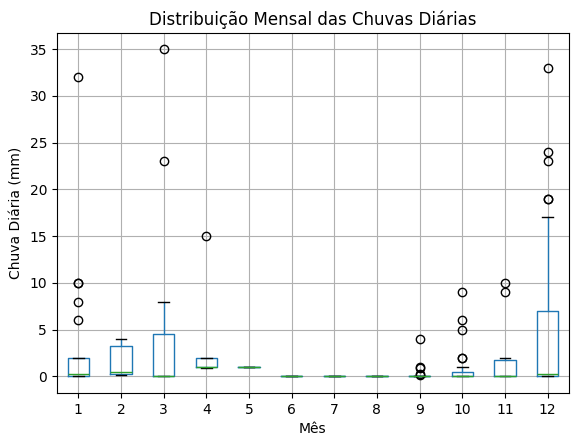

In [23]:
# Caminho do arquivo
path = r'C:\Users\rafael.shibayama\Documents\GitHub\ENS410064\2024\Dados\AirportFl.csv'

# Converter a coluna 'Data' para o formato datetime
data['Data'] = pd.to_datetime(data['Data'], format='%d/%m/%Y')

# Extrair o mês e criar uma coluna "Mês" para agregação
data['Mês'] = data['Data'].dt.month

# Selecionar apenas a coluna de interesse para chuva, removendo valores NaN
rain_data = data[['Mês', 'Chuva [Diaria] (mm)']].dropna()

# Plotar um boxplot para visualizar a distribuição das chuvas por mês
plt.figure(figsize=(10, 6))
rain_data.boxplot(column='Chuva [Diaria] (mm)', by='Mês', grid=False)

# Ajustar título e rótulos
plt.title('Distribuição Mensal das Chuvas Diárias')
plt.suptitle('') 
# Remove o título padrão de boxplot
plt.xlabel('Mês')
plt.ylabel('Chuva Diária (mm)')
plt.grid(True)

# Caminho para salvar a figura
base_path = r'C:\Users\rafael.shibayama\Documents\GitHub\ENS410064\2024\figuras'

# Nome do arquivo com o caminho completo
file_name = os.path.join(activity_folder, 'boxplot_AirportFl.png')

# Salvar a figura
plt.savefig(file_name, format='png', dpi=300)

# Exibir o gráfico
plt.show()

In [15]:
prefixed = [filename for filename in os.listdir(dataPath) if filename.startswith("AirportBsb")]

dataList = prefixed

print(prefixed)

path = r'C:\Users\rafael.shibayama\Documents\GitHub\ENS410064\2024\Dados\AirportBsb.csv'

data = pd.read_csv(path, encoding='ISO-8859-1')

data

['AirportBsb.csv']


,Data,Hora (UTC),Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),Temp. Min. [Diaria] (h),Chuva [Diaria] (mm)
0,01/01/2023,0,21.7,82.0,897.1,2.1,210.0,7.5,NaN,27.6,NaN,NaN
1,01/01/2023,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2023,600,19.3,91.0,896.0,1.0,310.0,3.8,NaN,NaN,NaN,NaN
3,01/01/2023,900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2023,1200,20.9,84.0,898.0,4.1,80.0,6.3,NaN,NaN,18.9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2923,01/01/2024,900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2924,01/01/2024,1200,23.4,69.0,896.4,3.1,310.0,6.3,NaN,NaN,21.1,0.0
2925,01/01/2024,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2926,01/01/2024,1800,24.2,75.0,892.4,3.1,40.0,0.0,NaN,NaN,NaN,NaN


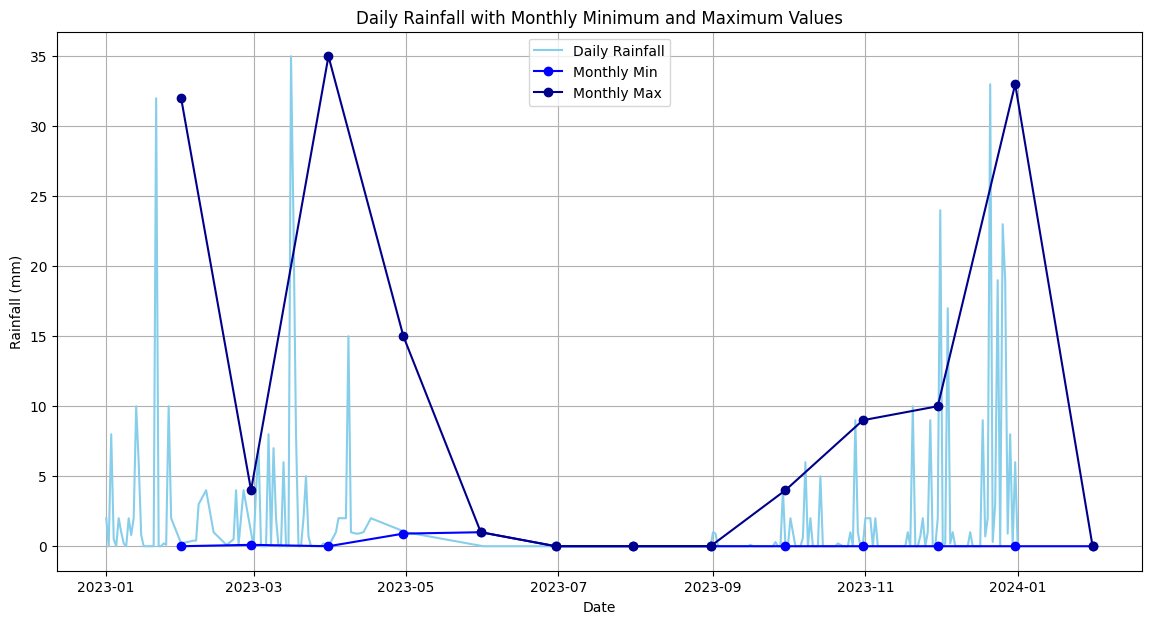

In [24]:
#  Caminho do arquivo CSV com os dados
path = r'C:\Users\rafael.shibayama\Documents\GitHub\ENS410064\2024\Dados\AirportBsb.csv'

# Converter a coluna 'Data' para o formato datetime para facilitar o agrupamento mensal
data['Data'] = pd.to_datetime(data['Data'], format='%d/%m/%Y')

# Selecionar apenas as colunas necessárias e remover linhas com valores de chuva nulos
rain_data = data[['Data', 'Chuva [Diaria] (mm)']].dropna()

# Definir a data como índice para facilitar a análise e o agrupamento
rain_data.set_index('Data', inplace=True)

# Calcular o mínimo e o máximo de precipitação mensal
monthly_min = rain_data.resample('ME').min()
monthly_max = rain_data.resample('ME').max()

# Plotar a precipitação diária com mínimos e máximos mensais
plt.figure(figsize=(14, 7))
plt.plot(rain_data.index, rain_data['Chuva [Diaria] (mm)'], label='Daily Rainfall', color='skyblue')
plt.plot(monthly_min.index, monthly_min['Chuva [Diaria] (mm)'], label='Monthly Min', marker='o', color='blue')
plt.plot(monthly_max.index, monthly_max['Chuva [Diaria] (mm)'], label='Monthly Max', marker='o', color='darkblue')

# Adicionar rótulos e título
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Daily Rainfall with Monthly Minimum and Maximum Values')
plt.legend()
plt.grid(True)

# Caminho para salvar a figura
base_path = r'C:\Users\rafael.shibayama\Documents\GitHub\ENS410064\2024\figuras'

# Nome do arquivo com o caminho completo
file_name = os.path.join(activity_folder, 'chuvas_AirportBsb.png')

# Salvar a figura
plt.savefig(file_name, format='png', dpi=300)

# Exibir o gráfico
plt.show()

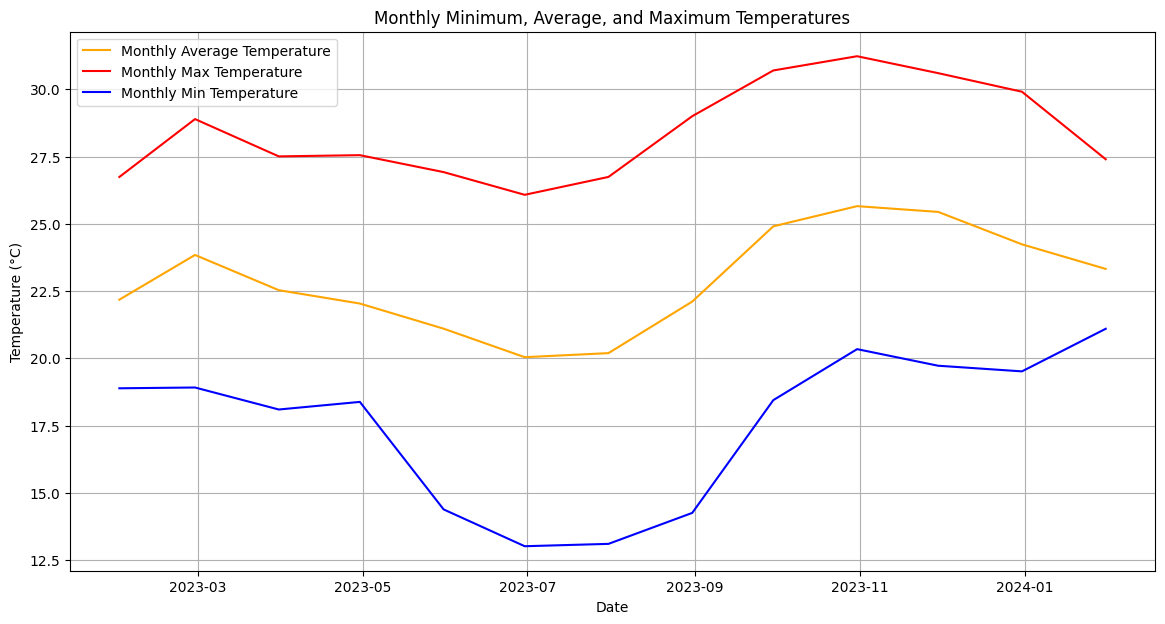

In [25]:
# Caminho do arquivo
path = r'C:\Users\rafael.shibayama\Documents\GitHub\ENS410064\2024\Dados\AirportBsb.csv'

# Converter a coluna 'Data' para o formato datetime para permitir a agregação mensal
data['Data'] = pd.to_datetime(data['Data'], format='%d/%m/%Y')

# Selecionar as colunas de interesse
temperature_data = data[['Data', 'Temp. [Hora] (C)', 'Temp. Max. [Diaria] (h)', 'Temp. Min. [Diaria] (h)']].copy()
temperature_data.set_index('Data', inplace=True)

# Calcular médias mensais para as temperaturas diária média, máxima e mínima
monthly_avg_temp = temperature_data['Temp. [Hora] (C)'].resample('ME').mean()
monthly_max_temp = temperature_data['Temp. Max. [Diaria] (h)'].resample('ME').mean()
monthly_min_temp = temperature_data['Temp. Min. [Diaria] (h)'].resample('ME').mean()

# Plotar os dados
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg_temp.index, monthly_avg_temp, label='Monthly Average Temperature', color='orange')
plt.plot(monthly_max_temp.index, monthly_max_temp, label='Monthly Max Temperature', color='red')
plt.plot(monthly_min_temp.index, monthly_min_temp, label='Monthly Min Temperature', color='blue')

# Adicionar rótulos e título
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Minimum, Average, and Maximum Temperatures')
plt.legend()
plt.grid(True)

# Caminho para salvar a figura
base_path = r'C:\Users\rafael.shibayama\Documents\GitHub\ENS410064\2024\figuras'

# Nome do arquivo com o caminho completo
file_name = os.path.join(activity_folder, 'temperatura_AirportBsb.png')

# Salvar a figura
plt.savefig(file_name, format='png', dpi=300)

# Exibir o gráfico
plt.show()

<Figure size 1000x600 with 0 Axes>

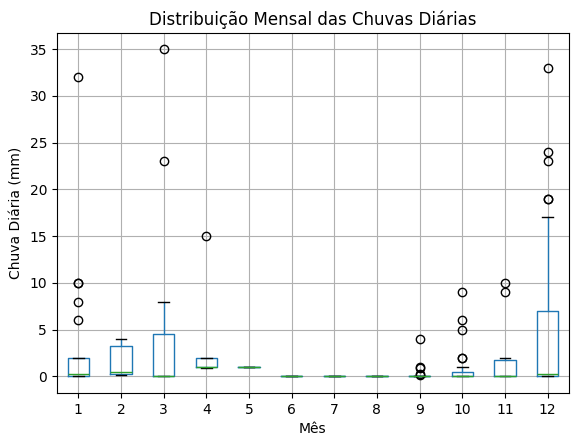

In [18]:
path = r'C:\Users\rafael.shibayama\Documents\GitHub\ENS410064\2024\Dados\AirportBsb.csv'

# Converter a coluna 'Data' para o formato datetime
data['Data'] = pd.to_datetime(data['Data'], format='%d/%m/%Y')

# Extrair o mês e criar uma coluna "Mês" para agregação
data['Mês'] = data['Data'].dt.month

# Selecionar apenas a coluna de interesse para chuva, removendo valores NaN
rain_data = data[['Mês', 'Chuva [Diaria] (mm)']].dropna()

# Plotar um boxplot para visualizar a distribuição das chuvas por mês
plt.figure(figsize=(10, 6))
rain_data.boxplot(column='Chuva [Diaria] (mm)', by='Mês', grid=False)

# Ajustar título e rótulos
plt.title('Distribuição Mensal das Chuvas Diárias')
plt.suptitle('') 
# Remove o título padrão de boxplot
plt.xlabel('Mês')
plt.ylabel('Chuva Diária (mm)')
plt.grid(True)

# Exibir o gráfico
plt.show()